# Week 2 - Linear Regression

In [454]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import math
from PIL import Image

In [455]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Read Data

In [456]:
data = pd.read_csv("ex1data1.txt", header=None)

In [457]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [458]:
def init_data(data):
    X, y = data[0], data[1]
    m = len(y)

    # Add ones for the intercept
    X = np.column_stack((np.ones(m), data[0]))
    theta = np.zeros((2, 1))[:, 0]
    iterations = 1000
    alpha = 0.01
    
    return X, y, m, theta, iterations, alpha

In [459]:
X, y, m, theta, iterations, alpha = init_data(data)

In [460]:
theta

array([0., 0.])

In [461]:
X[0:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [462]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: 1, dtype: float64

In [463]:
def plot_data(X_val, y_val):
    plt.scatter(X_val, y_val, marker="x", c="red", alpha=0.6)
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")


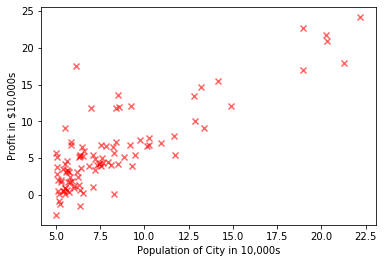

In [464]:
plot_data(X[:, 1], y)
plt.show()

## Formulas

In [465]:
def read_image(file, size=(5.5, 5.5)):
    img = mpimg.imread(file)
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.show()


Cost Function:

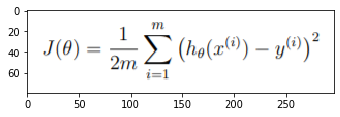

In [466]:
read_image("cost function.PNG")

Hypothesis (linear model):

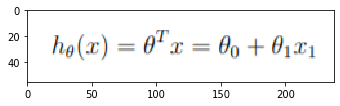

In [467]:
read_image("hypothesis linear function.PNG")

Updating coefficients

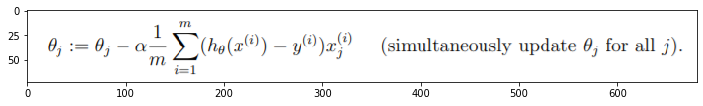

In [468]:
read_image("update theta.PNG", (12, 12))

## Cost Function

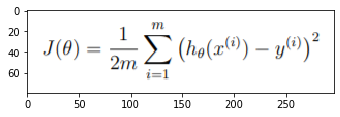

In [469]:
read_image("cost function.PNG")

In [470]:
X[0:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [471]:
# Calculate cost
def calculate_cost(X, y, theta):
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum((h - y) ** 2)
    
    return J

In [472]:
calculate_cost(X, y, theta)

32.072733877455676

In [473]:
print(theta)

[0. 0.]


In [474]:
X[:, 1]

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [475]:
y

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: 1, Length: 97, dtype: float64

[0. 0.]


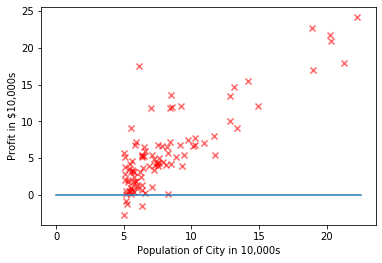

In [476]:
def plot_estimate(X, y, theta):
    print(theta)
    plot_data(X, y)
    p1 = (0, theta[0])
    p2 = (22.5, theta[0] + theta[1] * 22.5)
    points = list(zip(p1, p2))
    plt.plot(points[0], points[1])
    
plot_estimate(X[:, 1], y, theta)
plt.show()

## Gradient Descent

In [492]:
X, y, m, theta, iterations, alpha = init_data(data)

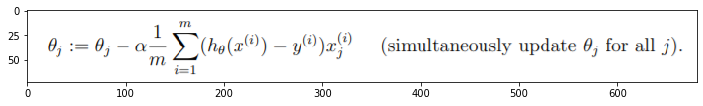

In [493]:
read_image("update theta.PNG", (12, 12))

In [494]:
calculate_cost(X, y, theta)

32.072733877455676

In [563]:
def gradient_descent(X, y, theta, m, alpha=0.01):
    h = X.dot(theta)
    loss = h - y
    gradient = (1 / m) * X.T.dot(loss)

    new_theta = theta - alpha * gradient

#     print("Alpha:", alpha)
#     print("Gradient:", gradient)
#     print("Old Theta:", theta)
#     print("New Theta:", new_theta)
#     print("Old Cost:", calculate_cost(X, y, theta))
#     print("New Cost:", calculate_cost(X, y, new_theta))
    
    return new_theta

In [496]:
for i in range(iterations):
    theta = gradient_descent(X, y, theta, m)

In [497]:
theta

array([-3.24140214,  1.1272942 ])

[-3.24140214  1.1272942 ]


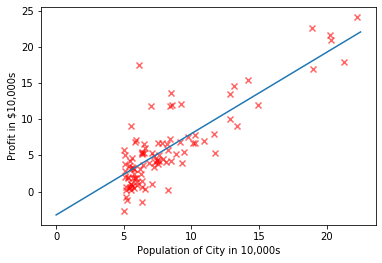

In [498]:
plot_estimate(X[:, 1], y, theta)
plt.show()

## Plot Cost Function

In [564]:
def plot_cost(data, new_alpha = 0.01):
    X, y, m, theta, iterations, alpha = init_data(data)

    alpha = new_alpha
    
    theta1_list = []
    theta2_list = []
    cost_list = []

    theta1_list.append(theta[0])
    theta2_list.append(theta[1])
    cost_list.append(calculate_cost(X, y, theta))

    for i in range(iterations):
        theta = gradient_descent(X, y, theta, m, alpha)
        cost = calculate_cost(X, y, theta)
        theta1_list.append(theta[0])
        theta2_list.append(theta[1])
        cost_list.append(cost)
        
    print(f"theta:{theta}, cost:{cost}")
    plt.plot(theta1_list, cost_list, marker="x")
    plt.show()
    plt.plot(theta2_list, cost_list, marker="x")
    plt.show()


theta:[-3.24140214  1.1272942 ], cost:4.515955503078912


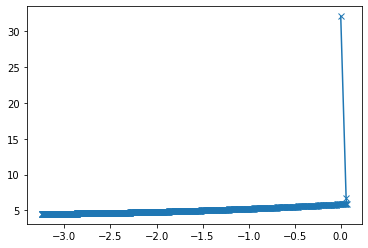

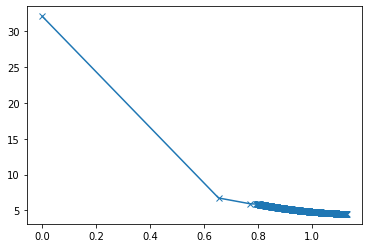

In [565]:
plot_cost(data)

theta:[-0.57607021  0.8595327 ], cost:5.480269332020323


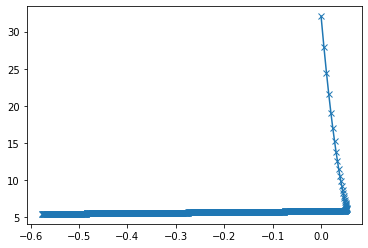

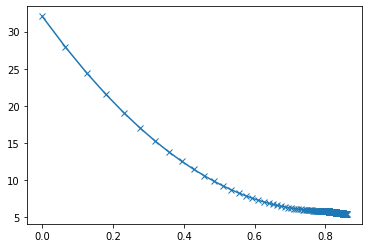

In [575]:
plot_cost(data, 0.001)

theta:[-2.49890395e+22 -2.48744066e+23], cost:2.569410453446055e+48


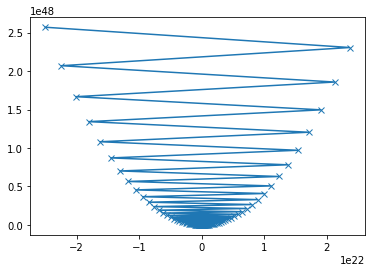

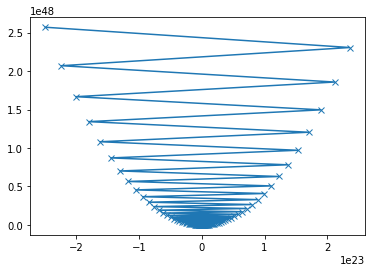

In [573]:
plot_cost(data, 0.025)

## Predict

In [576]:
theta

array([-3.24140214,  1.1272942 ])

In [578]:
predict1 = [1, 3.5] * theta
predict2 = [1, 7] * theta
print(f"Predict 1: {predict1}, Predict 2: {predict2}")

Predict 1: [-3.24140214  3.94552971], Predict 2: [-3.24140214  7.89105942]


[-3.24140214  1.1272942 ]


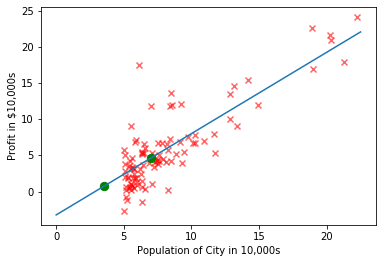

In [594]:
plot_estimate(X[:, 1], y, theta)
plt.scatter(3.5, predict1[0] + predict1[1], c="green", s=70)
plt.scatter(7, predict1[0] + predict2[1], c="green", s=70)
plt.show()

## Exercise 2

In [600]:
data2 = pd.read_csv("ex1data2.txt", header=None)

In [601]:
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [615]:
X = data2[[0, 1]]
y = data2[2]
m = len(y)

In [616]:
X[0:10]

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4
5,1985,4
6,1534,3
7,1427,3
8,1380,3
9,1494,3


In [617]:
y[0:10]

0    399900
1    329900
2    369000
3    232000
4    539900
5    299900
6    314900
7    198999
8    212000
9    242500
Name: 2, dtype: int64

### Normalise Features

In [627]:
mean = X.mean()
sd = np.sqrt(np.sum(((X - mean) ** 2)) / (m - 1))
print(mean)
print(sd)

0    2000.680851
1       3.170213
dtype: float64
0    794.702354
1      0.760982
dtype: float64


In [630]:
X_scaled = (X - mean) / sd

In [631]:
theta

array([0., 0.])

In [633]:
for i in range(iterations):
    theta = gradient_descent(X_scaled, y, theta, len(y))

In [634]:
theta

0    109848.008460
1     -5866.454085
dtype: float64

0    109848.008460
1     -5866.454085
dtype: float64


ValueError: x and y must be the same size

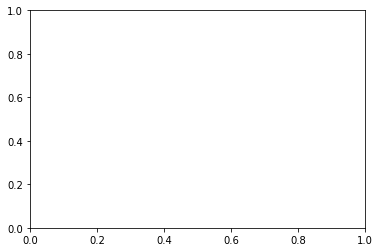

In [635]:
plot_estimate(X_scaled, y, theta)